# Dublin House Prices by Post Code
## Part 4 - Breaking Down the Data
We collected and cleaned the Property Price Register house price data in Part 1. In Part 2, we created a Google API object to help us find eirKeys for the addresses, and we then used a Naive Bayes machine learning algorithm to fill as many empty eirKey fields as we could. Now, it's time to examine the data and see what's been going on in the Dublin Housing market so far in 2016.

If you visit [](), you can download a notebook with intervactive `Bokeh` plots. In order to get this online, I'm only going to use `Matplotlib` only, the tried, tested and true.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import pickle

In [2]:
with open('../library/pickle/2016/prices_final_dublin_2016_pickle', 'r') as f:
    houses = pickle.load(f)
houses.describe()

,Lat,Lon,Price
count,10514.000000,10514.000000,1.127000e+04
mean,53.352123,-6.263577,4.002353e+05
std,0.071453,0.089437,7.359560e+05
min,53.202946,-6.501789,6.500000e+03
25%,53.297334,-6.317503,2.200000e+05
50%,53.343143,-6.255972,3.030000e+05
75%,53.385494,-6.199972,4.500000e+05
max,53.626983,-6.052932,6.408506e+07


### Dublin House Prices

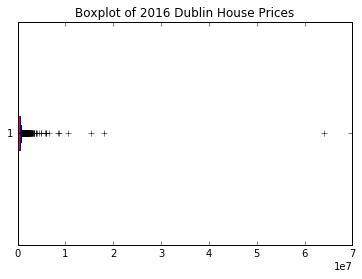

In [3]:
%matplotlib inline
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

We can see that there is one price here that is more than a little bigger than the rest.

In [4]:
houses[houses.Price == houses.Price.max()]

,Address,Date,Description,FullMarketPrice,Lat,Lon,Price,Size,VAT,eirKey,eirKeyName
6544,"Westpark, Tallaght, Dublin 24, Ireland",2016-01-15,New Dwelling house /Apartment,No,53.287019,-6.364894,64085057.0,greater than or equal to 38 sq metres and less...,Yes,D24,Tallaght


In [5]:
print "This costs €{:,.2f}.".format(houses[houses.Price == houses.Price.max()]['Price'].loc[6544]) 

This costs €64,085,057.00.


Sixty-four million Euro is a considerable chunk of change for "a" house. Again, as we said in Part 1, the sparse descriptions of the properties in the dataset don't always help us understand what's there.

We'll exclude this value from the dataset and carry on.

In [6]:
houses = houses[houses.Price < houses.Price.max()].copy()
houses.Price.describe()

count    1.126900e+04
mean     3.945840e+05
std      4.262765e+05
min      6.500000e+03
25%      2.200000e+05
50%      3.030000e+05
75%      4.500000e+05
max      1.815000e+07
Name: Price, dtype: float64

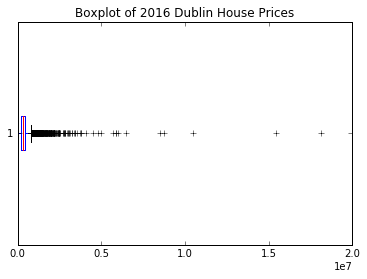

In [7]:
plt.boxplot(houses.Price.values, vert=False)
plt.title('Boxplot of 2016 Dublin House Prices')

### The Ten Most Expensive Houses

In [8]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price', ascending = False).head(10)

,Address,Date,Description,Price,Size,eirKey
9443,"1 Coldcut Cres, Coldcut, Dublin 22, Ireland",2016-08-31,Second-Hand Dwelling house /Apartment,18150000.0,,D20
10677,"KYLEMORE CLINIC, 49 CHURCH ROAD, BALLYBRACK",2016-04-07,Second-Hand Dwelling house /Apartment,15450000.0,,A96
7250,"Johnstown Rd, Cabinteely, Co. Dublin, Ireland",2016-03-10,Second-Hand Dwelling house /Apartment,10500000.0,,A96
8000,"19 Temple Rd, Dublin, Ireland",2016-05-18,Second-Hand Dwelling house /Apartment,8725000.0,,D06
10823,"APARTMENTS 1-21, BROADSTONE HALL, PHIBSBORO ROAD",2016-06-02,Second-Hand Dwelling house /Apartment,8500000.0,,glugger
1904,"5 Temple Pl, Dublin 6, D06 K772, Ireland",2016-04-22,Second-Hand Dwelling house /Apartment,6500000.0,,D06
9675,"Beulah House, Harbour Rd, Glenageary, Dalkey, ...",2016-09-15,Second-Hand Dwelling house /Apartment,6000000.0,,A96
6080,"51 Ailesbury Rd, Dublin 4, D04 YY59, Ireland",2016-10-28,Second-Hand Dwelling house /Apartment,5900000.0,,D04
8653,"1 Temple Gardens, Dublin, Ireland",2016-07-01,Second-Hand Dwelling house /Apartment,5850000.0,,D06
8820,"Cedar Lodge, Merrion Rd, Dublin 4, Ireland",2016-07-12,Second-Hand Dwelling house /Apartment,5700000.0,,D04


### The Ten Least Expensive Houses

In [9]:
houses[['Address', 'Date', 'Description', 'Price', 'Size', 'eirKey']].sort_values('Price').head(10)

,Address,Date,Description,Price,Size,eirKey
5381,"2A Ashton Cl, Ballyroan, Dublin 16, D16 C672, ...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
5374,"2 Ashton Cl, Ballyroan, Dublin 16, D16 T0C6, I...",2016-09-29,Second-Hand Dwelling house /Apartment,6500.0,,D16
98,"1 Strand Rd, Dublin 4, D04 W9K6, Ireland",2016-01-12,Second-Hand Dwelling house /Apartment,9000.0,,D04
1171,"13 Castlecurragh Heath, Buzzardstown, Dublin 1...",2016-03-10,Second-Hand Dwelling house /Apartment,9031.0,,D15
4187,"652 Whitechurch Rd, Rathfarnham, Dublin 16, D1...",2016-08-10,Second-Hand Dwelling house /Apartment,10000.0,,D16
897,"46 Kenilworth Square S, Dublin 6, D06 Y152, Ir...",2016-02-25,Second-Hand Dwelling house /Apartment,10000.0,,D06
610,"76 Boot Rd, Brideswell Commons, Dublin 22, D22...",2016-02-11,Second-Hand Dwelling house /Apartment,10476.0,,D22
5652,"92 Westhaven, Huntstown, Dublin 15, D15 A6KK, ...",2016-10-11,Second-Hand Dwelling house /Apartment,11000.0,,D15
5476,"7 Clancarthy Rd, Clontarf, Dublin 5, D05 PE03,...",2016-10-03,Second-Hand Dwelling house /Apartment,12000.0,,D05
2201,"19A Cloonlara Rd, Finglas South, Dublin 11, D1...",2016-05-09,Second-Hand Dwelling house /Apartment,12000.0,,D11


### Houses Sold by eirKeyName
Let's look at a boxplot of house prices broken down by eirKey. We'll only include those postal areas for which we have one hundred or more data points.

In [10]:
houses.eirKeyName.value_counts()

Castleknock      956
Killiney         575
Stepaside        557
Tallaght         555
Blackrock        537
Crumlin          535
Ballsbridge      520
Cabra            519
Donaghmede       471
Rathmines        470
Swords           464
Malahide         460
Churchtown       454
Finglas          441
Ballinteer       438
Drumcondra       432
Lucan            365
Dolphins Barn    362
Clontarf         348
Raheny           308
Balbriggan       245
Clondalkin       240
D02              150
D01              142
Skerries         118
Ballyfermot      118
Rush              79
Palmerstown       73
Lusk              55
Coolock           55
Bray              20
Oldtown Court      3
Ballyboughal       1
Dunboyne           1
Garristown         1
Name: eirKeyName, dtype: int64

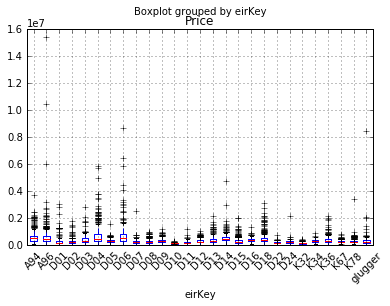

In [11]:
houses_list = list(houses.eirKey.value_counts().keys())
eirKeyBoxplotData = houses[houses['eirKey'].isin(houses_list[:-10])]
eirKeyBoxplotData.boxplot('Price', 'eirKey', rot=45)

### Removing More Outliers
Again, we see house prices here that are so large they are crushing the distribution visibility of the others. Therefore, we'll cap our house prices at five million Euro or less, and look again.

In [12]:
eirKeyBoxplotData = eirKeyBoxplotData[eirKeyBoxplotData.Price < 5000000]
eirKeyBoxplotData['Price'].describe()

count    1.096900e+04
mean     3.899348e+05
std      3.170312e+05
min      6.500000e+03
25%      2.200000e+05
50%      3.060000e+05
75%      4.537440e+05
max      4.980875e+06
Name: Price, dtype: float64

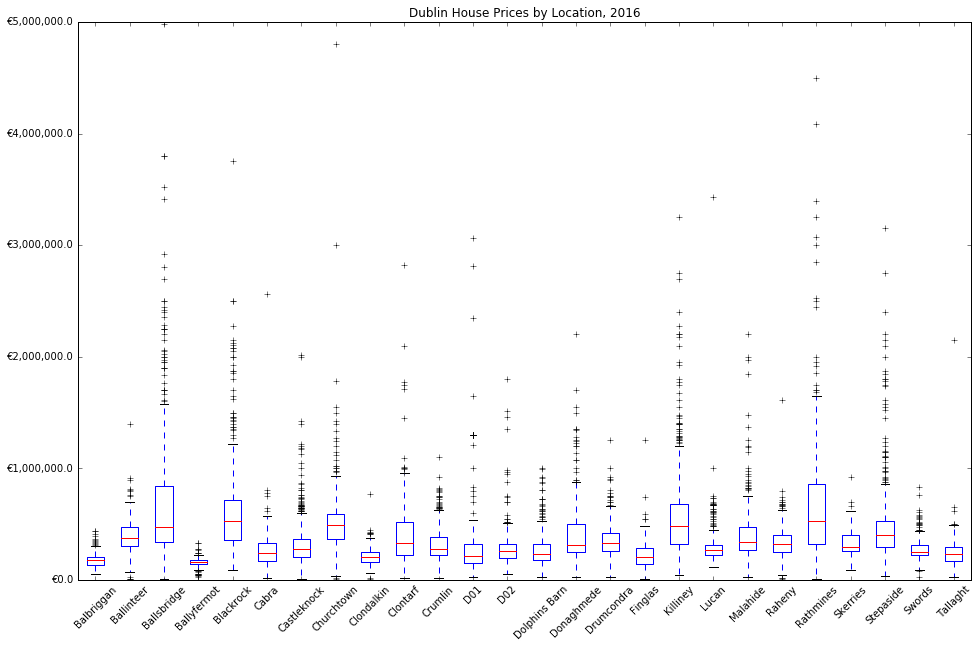

In [13]:
from __future__ import unicode_literals # Allow use of the € symbol

boxData = []
boxLabels = []

byEirKeyName = eirKeyBoxplotData.groupby('eirKeyName')

for label, data in byEirKeyName:
    boxLabels.append(label)
    boxData.append(data.Price.values)

fig, ax = plt.subplots(1,1, figsize=(16,10))

myMoneyFormat = ticker.StrMethodFormatter('€{x:,}')

plt.boxplot(boxData, labels=boxLabels)    
ax.yaxis.set_major_formatter(myMoneyFormat)
plt.xticks(rotation = 45)
plt.title('Dublin House Prices by Location, 2016')

### Conclusions
The boxplot is the most eloquent of all the graphs that show data, because it shows the most information in the least amount of space. From one single boxplot we can clearly see:
1. Although the most houses sold - for which we have data - are in Dublin 15/Castleknock, these are by no means the most expensive.
2. Although the spread of house prices is clearly different for every post code, it is possible to pay well over the odds in any postcode. Every single boxplot above shows outlier data, and that's after capping the value of the houses at five million Euro.
3. The least-expensive place to buy a house in 2016 is Dublin 10/Ballyfermot. It's also got the smallest inter-quantile range of all the postal areas. The most expensive house in Dublin 10 just about makes it to the first quartile of house prices in Dublin 4.

### When Were the Houses Sold?
It is remarkable that so many houses are being sold in Dublin 15. If we look at house sales broken down by date and by postal area, can we see if there is any pattern there?

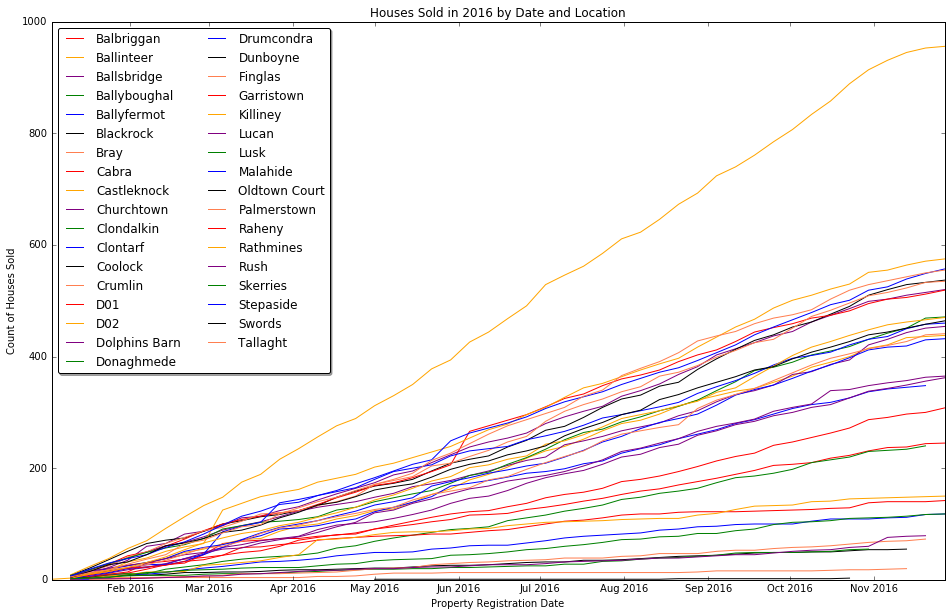

In [14]:
colors = ['red', 'orange', 'purple', 'green', 'blue', 'black', 'coral']
pcs = houses.groupby('eirKeyName')
counter = 0
fig, ax = plt.subplots(1,1, figsize=(16,10))
for pc, details in pcs:
#     plot_from_zero = pd.DataFrame([0, 0])
    temp = details.copy()
    temp = temp[['Date', 'Address']]
    temp = temp.set_index('Date')
    temp = temp.resample('W').count()
    
    plt.plot(temp.index, temp.cumsum(), label=pc, color = colors[counter])
    
    if counter == 6:
        counter = 0
    else:
        counter += 1
        
# plt.legend(loc='best')
plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True)
plt.title('Houses Sold in 2016 by Date and Location')
plt.xlabel('Property Registration Date')
plt.ylabel('Count of Houses Sold')